<a href="https://colab.research.google.com/github/Terrisine/Machine-Learning-module-codes/blob/main/Final_Support_Vector_Machine_and_Random_Forest_Classifier_assessment_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heart redone.csv') 
print(df.info(),'\n')
print(df.head(),'\n')
print(df.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None 

   age  sex  cp   trestbps  chol   fbs   restecg  thalach   exang   oldpeak  \
0   52    1    0       125    212     0        1       168       0      1.0   
1   53    1    0       140    203     1        0   

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=50) 

In [ ]:
#We are using a function called Robust scaling. we are telling the program that we have a data with the original units and a scaled data with transformed data
#best to do this scaling after importing and splitting the data.
# this is to standardise the data, there are other forms of standardisation 

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import RobustScaler
num_cols = df.select_dtypes(include='number').columns.tolist()
scaler = RobustScaler()
scaler.fit(df[num_cols])
df[num_cols] = scaler.transform(df[num_cols])

In [ ]:
#because we are using SVM for classification the function looks like this
classifier = svm.SVC() # we are trying to call a classification model

In [ ]:
hyperparameters = {'kernel': ['linear'],
                   'C': [0.01, 0.1],
                   'gamma': [0.01, 0.1]} # we are creating a 2d problem so there is need to state a line. if it is a 3d problem it will be a plane dividing the groups.
                   #we have two parameters - c, gamma, both should be lower. Lower means higher separation and wider the margin. In SVM we are trying to widen the margin between the two groups of data.the higher the c the narrower the margin. 
                    

there are parameters in classificationa and Random Forest model. Look at past code to see the code and parameters for the latter.

In [ ]:
grid_search = GridSearchCV(classifier, hyperparameters, cv=5)
grid_search.fit(X_train_scaled, y_train)
# this is going to do a search and in total run 4 models. if you increase the grids, it takes longer time to compute because it is running through all the models inside.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1], 'gamma': [0.01, 0.1],
                         'kernel': ['linear']})

In [ ]:
#Now among the four models, this is picked to be the best
best_classifier = grid_search.best_estimator_
print(best_classifier,'\n')
y_pred = best_classifier.predict(X_test_scaled)

SVC(C=0.1, gamma=0.01, kernel='linear') 



In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#Now this is the classification matrix. the output shows 0 in the first column so there was 100% misclassification. So there is no F1 score or Recall as well as Precision. the diagonal total is 

[[109  36]
 [ 17 146]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       145
           1       0.80      0.90      0.85       163

    accuracy                           0.83       308
   macro avg       0.83      0.82      0.83       308
weighted avg       0.83      0.83      0.83       308



age         0.042768
sex        -1.003271
cp          1.081856
trestbps   -0.194739
chol       -0.063597
fbs         0.105189
restecg     0.297671
thalach     0.486398
exang      -0.697249
oldpeak    -0.817506
slope       0.276287
ca         -0.318247
thal       -0.751769
dtype: float64 

age         0.042768
sex         1.003271
cp          1.081856
trestbps    0.194739
chol        0.063597
fbs         0.105189
restecg     0.297671
thalach     0.486398
exang       0.697249
oldpeak     0.817506
slope       0.276287
ca          0.318247
thal        0.751769
dtype: float64 



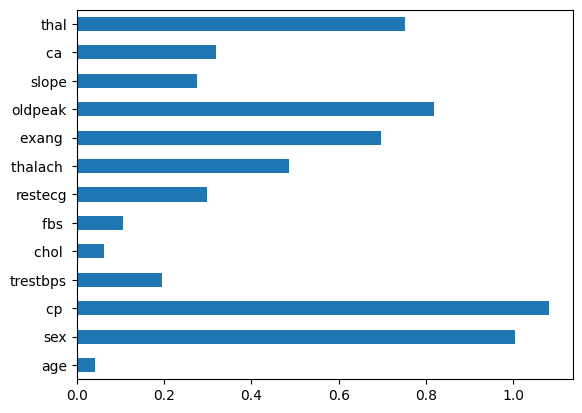

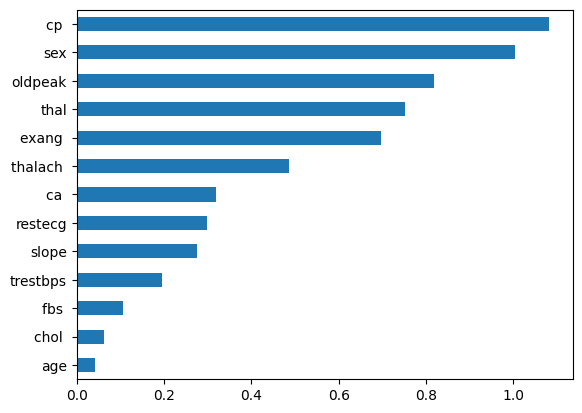

In [ ]:
import matplotlib.pyplot as plt
importances = pd.Series(best_classifier.coef_[0], index=X_train.columns)
print(importances,'\n')
importances=abs(importances)
print(importances,'\n')
importances.plot(kind='barh')
plt.show() 
importances.sort_values(ascending=True, inplace=True)
importances.plot(kind='barh')
plt.show()

# We are asking for the imporatance of the features.

[[109  36]
 [ 17 146]]


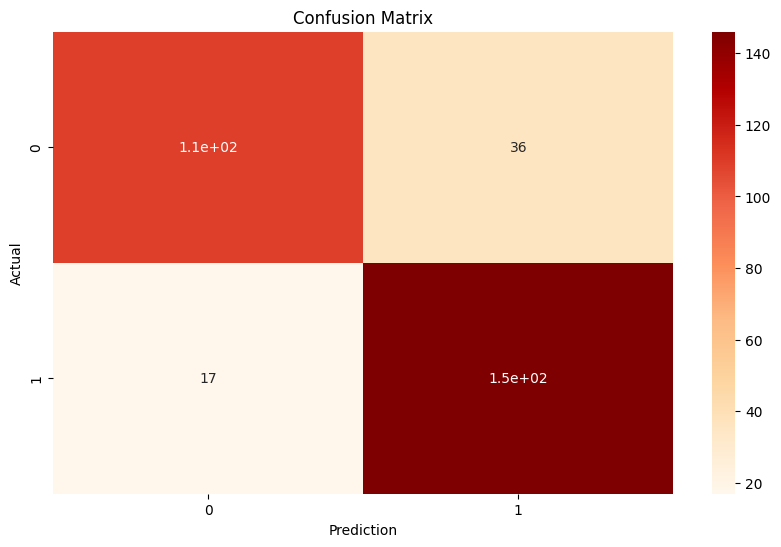

In [ ]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (10,6))
sns.heatmap(matrix, annot = True, cmap = 'OrRd')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

Random forest classifier

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
disease = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heart redone.csv')
disease.shape #number of rows and columns

(1025, 14)

In [ ]:
disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df = pd.DataFrame(disease)
df['sex'] = df['sex'].astype('category')
df['target'] = df['target'].astype('category')
df['sex'] = df['sex'].cat.codes
df['target'] = df['target'].cat.codes
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
X = df.drop('target', axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(717, 13)
(717,)
(308, 13)
(308,)


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, max_features='sqrt', random_state=1, n_jobs=1, verbose=1)

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=50) 

In [ ]:

random_forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestClassifier(max_depth=5, n_jobs=1, random_state=1, verbose=1)

In [ ]:
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8961038961038961
Confusion Matrix:
 [[127  18]
 [ 14 149]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
y_pred_prob = random_forest.predict_proba(X_test)
print("y_pred_prob")

y_pred_prob


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


age         0.048959
sex         0.039328
cp          0.184129
trestbps    0.047516
chol        0.036605
fbs         0.004726
restecg     0.009296
thalach     0.106830
exang       0.087910
oldpeak     0.109024
slope       0.058092
ca          0.090275
thal        0.177308
dtype: float64 

age         0.048959
sex         0.039328
cp          0.184129
trestbps    0.047516
chol        0.036605
fbs         0.004726
restecg     0.009296
thalach     0.106830
exang       0.087910
oldpeak     0.109024
slope       0.058092
ca          0.090275
thal        0.177308
dtype: float64 



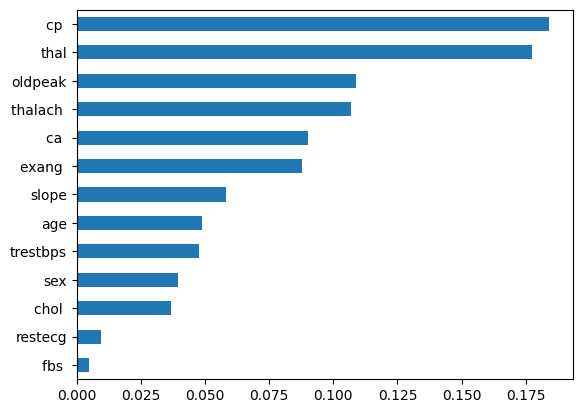

In [ ]:
importances = pd.Series(random_forest.feature_importances_, index=X_train.columns)
print(importances,'\n')
importances=abs(importances)
print(importances,'\n')
importances.sort_values(ascending=True, inplace=True)
importances.plot(kind='barh')
plt.show()

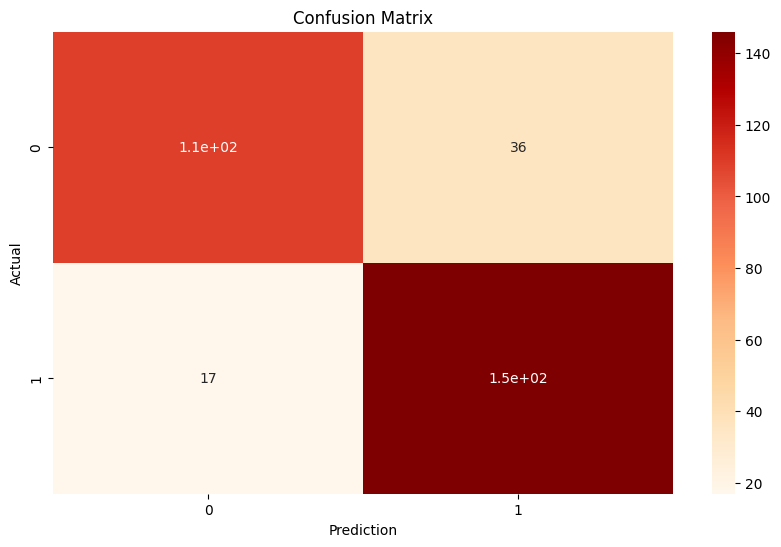

In [ ]:
#heatmap matrix
plt.figure(figsize = (10,6))
sns.heatmap(matrix, annot = True, cmap = 'OrRd')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()